In [1]:
#importing envirocar

%load_ext autoreload
%autoreload 2

# load dependencies'
import pandas as pd
import geopandas as gpd

from envirocar import TrackAPI, DownloadClient, BboxSelector, ECConfig

# create an initial but optional config and an api client
config = ECConfig()
track_api = TrackAPI(api_client=DownloadClient(config=config))

In [2]:
#selecting tracks within a bounding box
bbox = BboxSelector([
    7.601165771484375, # min_x
    51.94807412325402, # min_y
    7.648200988769531, # max_x
    51.97261482608728  # max_y
])

# issue a query
track_df = track_api.get_tracks(bbox=bbox, num_results=50) # requesting 50 tracks inside the bbox
track_df

,id,time,geometry,Speed.value,Speed.unit,Throttle Position.value,Throttle Position.unit,GPS VDOP.value,GPS VDOP.unit,GPS Altitude.value,...,sensor.constructionYear,sensor.manufacturer,track.appVersion,track.touVersion,O2 Lambda Voltage ER.value,O2 Lambda Voltage ER.unit,MAF.value,MAF.unit,O2 Lambda Voltage.value,O2 Lambda Voltage.unit
0,5eec7aa7d6e3cf256ba3effb,2020-06-18T21:49:51,POINT (7.65252 51.95404),0.000000,km/h,17.0,%,1.000000,precision,100.000003,...,2007,Dodge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5eec7aa7d6e3cf256ba3effd,2020-06-18T21:49:56,POINT (7.65252 51.95404),0.000000,km/h,17.0,%,0.868047,precision,100.000003,...,2007,Dodge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5eec7aa7d6e3cf256ba3effe,2020-06-18T21:50:01,POINT (7.65252 51.95404),0.000000,km/h,16.0,%,1.000000,precision,99.999997,...,2007,Dodge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5eec7aa7d6e3cf256ba3efff,2020-06-18T21:50:06,POINT (7.65252 51.95404),0.000000,km/h,17.0,%,0.872764,precision,100.000000,...,2007,Dodge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5eec7aa7d6e3cf256ba3f000,2020-06-18T21:50:11,POINT (7.65249 51.95402),2.000000,km/h,16.0,%,1.000000,precision,98.000003,...,2007,Dodge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,5dcd0c4444ea856b704c40cc,2019-10-31T14:37:26,POINT (7.63761 51.95630),18.000000,km/h,NaN,NaN,0.700000,precision,109.105019,...,2018,Volkswagen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,5dcd0c4444ea856b704c40cd,2019-10-31T14:37:31,POINT (7.63768 51.95653),22.887641,km/h,NaN,NaN,0.700000,precision,106.032607,...,2018,Volkswagen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163,5dcd0c4444ea856b704c40ce,2019-10-31T14:37:36,POINT (7.63774 51.95684),24.828686,km/h,NaN,NaN,0.700000,precision,105.397406,...,2018,Volkswagen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164,5dcd0c4444ea856b704c40cf,2019-10-31T14:37:41,POINT (7.63784 51.95723),37.000000,km/h,NaN,NaN,0.710060,precision,108.572160,...,2018,Volkswagen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
some_track_id30 = track_df['track.id'].unique()[30]
track_30 = track_df[track_df['track.id'] == some_track_id30]


some_track_id31 = track_df['track.id'].unique()[31]
track_31 = track_df[track_df['track.id'] == some_track_id31]


some_track_id32 = track_df['track.id'].unique()[32]
track_32 = track_df[track_df['track.id'] == some_track_id32]


some_track_id33 = track_df['track.id'].unique()[33]
track_33 = track_df[track_df['track.id'] == some_track_id33]


some_track_id34 = track_df['track.id'].unique()[34]
track_34 = track_df[track_df['track.id'] == some_track_id34]


some_track_id38 = track_df['track.id'].unique()[38]
track_38 = track_df[track_df['track.id'] == some_track_id38]

some_track_id39 = track_df['track.id'].unique()[39]
track_39 = track_df[track_df['track.id'] == some_track_id39]

some_track_id40 = track_df['track.id'].unique()[40]
track_40 = track_df[track_df['track.id'] == some_track_id40]

some_track_id45 = track_df['track.id'].unique()[45]
track_45 = track_df[track_df['track.id'] == some_track_id45]




c:\users\sindh\appdata\local\programs\python\python37\lib\site-packages\osmnx\plot.py:55: UserWarning: The fig_height, fig_width parameter(s) have been deprecated and will be removed in the next release. Note, fig_height and fig_width are replaced by the figsize parameter, use that instead. 
  warnings.warn(msg)


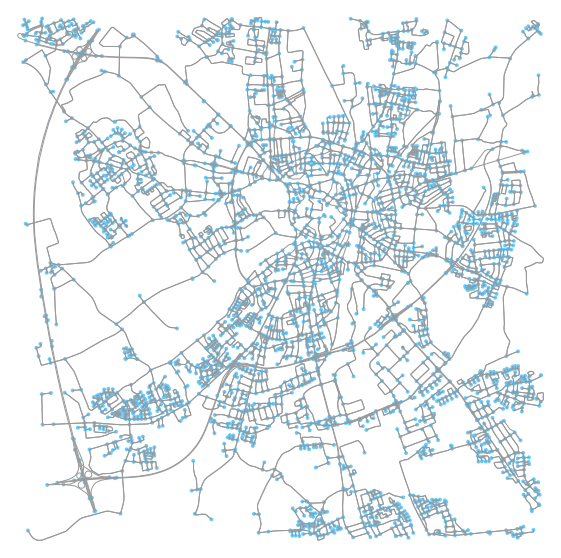

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a0e1577848>)

In [4]:
import numpy as np
import osmnx as ox

lat = 51.950296032982756
lng = 7.615756988525391

# Get the OSM graph of "drive" streets for münster an plot it
graph = ox.graph_from_point((lat, lng), dist=5000, network_type='drive')
ox.plot_graph(graph, fig_height=10, fig_width=10)

In [5]:
from leuvenmapmatching.matcher.distance import DistanceMatcher
from leuvenmapmatching.map.inmem import InMemMap
from leuvenmapmatching.matcher.newsonkrumm import NewsonKrummMatcher

# Leuven Map Matching is using a different internal graph structure for the street data. 
# Therefore, the OSMnx graph needs to be transformed to the InMemMap
streetmap = InMemMap("enviroCar", use_latlon=True, use_rtree=True, index_edges=True)

# add nodes
nodes = list(graph.nodes)
for node in nodes:
    #if graph.nodes[node]['highway'] == 'traffic_signals':
    lng = graph.nodes[node]['x']
    lat = graph.nodes[node]['y']
    streetmap.add_node(node, (lat, lng))
    #print(graph.nodes[node]['highway'])

# add edges
edges = list(graph.edges)
for edge in edges:
    node_a, node_b = edge[0], edge[1]
    streetmap.add_edge(node_a, node_b)
    #print(graph.edges[edge]['name'])
    # exclude bi-directional edges when street is oneway
    if not graph.edges[edge]['oneway']:
        streetmap.add_edge(node_b, node_a)
    
streetmap.purge()

c:\users\sindh\appdata\local\programs\python\python37\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
c:\users\sindh\appdata\local\programs\python\python37\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [24]:
# Get the latitude and longitude coordinates from the track and join them in an array
lats = list(track_31['geometry'].apply(lambda coord: coord.y))
lngs = list(track_31['geometry'].apply(lambda coord: coord.x))

track_coords = [c for c in zip(lats, lngs)]

from leuvenmapmatching.matcher.simple import SimpleMatcher
# Configure the mapmatcher. For increasing the performance it is important 
# that max_dist (in meters) is not set too high
matcher = NewsonKrummMatcher(streetmap,
                          max_dist=100, 
                          max_dist_init=200,
                          #non_emitting_length_factor=0.75,
                          obs_noise=100,
                          #obs_noise_ne=75,
                          dist_noise=5,
                          non_emitting_states=False,
                          non_emitting_edgeid=False)
edge_ids, last_idx = matcher.match(track_coords)

In [25]:
import folium

lat = 51.950296032982756
lng = 7.615756988525391

# get the coordinates of the "best" mapmatched route
coords = [m.edge_m.pi[:] for m in matcher.lattice_best]

# plot both raw and mapmatched track
m = folium.Map(location=[lat, lng], zoom_start=13)
folium.PolyLine(coords, color='blue').add_to(m)
folium.PolyLine(track_coords, color='red').add_to(m)
m

In [63]:
i = 0
edg = []
for edge in edge_ids:
    index = edge_ids[i]
    tup = list(index)
    tup.append(0)
    ed = tuple(tup)
    edg.append(ed)
    i = i+1
track_31['Edge'] = edg
track_31['Coords'] = coords
track_31

c:\users\sindh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
c:\users\sindh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,id,time,geometry,Speed.value,Speed.unit,Throttle Position.value,Throttle Position.unit,GPS VDOP.value,GPS VDOP.unit,GPS Altitude.value,...,track.appVersion,track.touVersion,O2 Lambda Voltage ER.value,O2 Lambda Voltage ER.unit,MAF.value,MAF.unit,O2 Lambda Voltage.value,O2 Lambda Voltage.unit,Edge,Coords
0,5de9d7a03bdb691868e765cf,2019-11-27T14:56:33,POINT (7.65039 51.94099),0.000000,km/h,13.000000,%,1.212573,precision,92.221026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(1611622417, 4017092106, 0)","(51.94162607645247, 7.6508964156561055)"
1,5de9d7a03bdb691868e765d1,2019-11-27T14:56:38,POINT (7.65039 51.94099),0.000000,km/h,13.336957,%,1.000000,precision,93.178808,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(1611622417, 4017092106, 0)","(51.94162666536771, 7.650894440938618)"
2,5de9d7a03bdb691868e765d2,2019-11-27T14:56:43,POINT (7.65036 51.94100),9.135514,km/h,18.098877,%,1.000000,precision,95.268083,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(1611622417, 4017092106, 0)","(51.94163674597954, 7.6508606391715075)"
3,5de9d7a03bdb691868e765d3,2019-11-27T14:56:48,POINT (7.65004 51.94121),36.277108,km/h,20.248292,%,1.042262,precision,95.467452,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(1611622417, 4017092106, 0)","(51.94175269353321, 7.650471846625076)"
4,5de9d7a03bdb691868e765d4,2019-11-27T14:56:53,POINT (7.64947 51.94158),47.240175,km/h,16.918660,%,1.033501,precision,95.101802,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(1611622417, 4017092106, 0)","(51.94196217101947, 7.64976941577681)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,5de9d7a03bdb691868e766d2,2019-11-27T15:18:25,POINT (7.58793 51.96553),39.000001,km/h,13.000000,%,1.484677,precision,105.664587,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(58707674, 248507696, 0)","(51.96548375668035, 7.587915909101408)"
259,5de9d7a03bdb691868e766d3,2019-11-27T15:18:30,POINT (7.58722 51.96557),26.023561,km/h,13.000000,%,1.201988,precision,106.022015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(248507696, 267874710, 0)","(51.96550560657136, 7.5872147042426175)"
260,5de9d7a03bdb691868e766d4,2019-11-27T15:18:36,POINT (7.58703 51.96558),0.000000,km/h,17.216216,%,1.765377,precision,105.963986,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(248507696, 267874710, 0)","(51.96550744845945, 7.587026139547628)"
261,5de9d7a03bdb691868e766d5,2019-11-27T15:18:41,POINT (7.58691 51.96549),14.492308,km/h,13.000000,%,1.741742,precision,106.356453,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(248507696, 267874710, 0)","(51.96550858188224, 7.586910089190246)"


In [64]:
# Get the latitude and longitude coordinates from the track and join them in an array
lats32 = list(track_32['geometry'].apply(lambda coord: coord.y))
lngs32 = list(track_32['geometry'].apply(lambda coord: coord.x))

track_coords32 = [c for c in zip(lats32, lngs32)]

# Perform the mapmatching 
edge_ids32, last_idx32 = matcher.match(track_coords32)
i = 0
edg32 = []
for edge in edge_ids32:
    index = edge_ids32[i]
    tup = list(index)
    tup.append(0)
    ed = tuple(tup)
    edg32.append(ed)
    i = i+1
    
track_32['Edge'] = edg32
coords = [m.edge_m.pi[:] for m in matcher.lattice_best]
track_32['Coords'] = coords

c:\users\sindh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\sindh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [65]:
# Get the latitude and longitude coordinates from the track and join them in an array
lats33 = list(track_33['geometry'].apply(lambda coord: coord.y))
lngs33 = list(track_33['geometry'].apply(lambda coord: coord.x))

track_coords33 = [c for c in zip(lats33, lngs33)]

# Perform the mapmatching 
edge_ids33, last_idx33 = matcher.match(track_coords33)
i = 0
edg33 = []
for edge in edge_ids33:
    index = edge_ids33[i]
    tup = list(index)
    tup.append(0)
    ed = tuple(tup)
    edg33.append(ed)
    i = i+1
    
track_33['Edge'] = edg33
coords = [m.edge_m.pi[:] for m in matcher.lattice_best]
track_33['Coords'] = coords

c:\users\sindh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\sindh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [66]:
lats34 = list(track_34['geometry'].apply(lambda coord: coord.y))
lngs34 = list(track_34['geometry'].apply(lambda coord: coord.x))

track_coords34 = [c for c in zip(lats34, lngs34)]

# Perform the mapmatching 
edge_ids34, last_idx34 = matcher.match(track_coords34)

i = 0
edg34 = []
for edge in edge_ids34:
    index = edge_ids34[i]
    tup = list(index)
    tup.append(0)
    ed = tuple(tup)
    edg34.append(ed)
    i = i+1
track_34["Edge"]=edg34
coords = [m.edge_m.pi[:] for m in matcher.lattice_best]
track_34['Coords'] = coords

c:\users\sindh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\sindh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [67]:
lats39 = list(track_39['geometry'].apply(lambda coord: coord.y))
lngs39 = list(track_39['geometry'].apply(lambda coord: coord.x))

track_coords39 = [c for c in zip(lats39, lngs39)]

# Perform the mapmatching 
edge_ids39, last_idx39 = matcher.match(track_coords39)


i = 0
edg39 = []
for edge in edge_ids39:
    index = edge_ids39[i]
    tup = list(index)
    tup.append(0)
    ed = tuple(tup)
    edg39.append(ed)
    i = i+1

track_39["Edge"]=edg39
coords = [m.edge_m.pi[:] for m in matcher.lattice_best]
track_39['Coords'] = coords


c:\users\sindh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\sindh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [69]:
lats40 = list(track_40['geometry'].apply(lambda coord: coord.y))
lngs40 = list(track_40['geometry'].apply(lambda coord: coord.x))

track_coords40 = [c for c in zip(lats40, lngs40)]

# Perform the mapmatching 
edge_ids40, last_idx40 = matcher.match(track_coords40)
i = 0
edg40 = []
for edge in edge_ids40:
    index = edge_ids40[i]
    tup = list(index)
    tup.append(0)
    ed = tuple(tup)
    edg40.append(ed)
    i = i+1
    
track_40['Edge'] = edg40
coords = [m.edge_m.pi[:] for m in matcher.lattice_best]
track_40['Coords'] = coords

c:\users\sindh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\sindh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [78]:
#combine the df of 6 tracks
tracks = pd.concat([track_31, track_32, track_33, track_39], ignore_index=True)
lat = []
long = []
for i in tracks['Coords']:
    li = list(i)
    lat.append(li[0])
    long.append(li[1])
tracks['Latitude'] = lat
tracks['Longitude'] = long
tracks.to_csv('C:/Users/sindh/Documents/GitHub/tracks_concat.csv')
tracks

,id,time,geometry,Speed.value,Speed.unit,Throttle Position.value,Throttle Position.unit,GPS VDOP.value,GPS VDOP.unit,GPS Altitude.value,...,O2 Lambda Voltage ER.value,O2 Lambda Voltage ER.unit,MAF.value,MAF.unit,O2 Lambda Voltage.value,O2 Lambda Voltage.unit,Edge,Coords,Latitude,Longitude
0,5de9d7a03bdb691868e765cf,2019-11-27T14:56:33,POINT (7.65039 51.94099),0.000000,km/h,13.000000,%,1.212573,precision,92.221026,...,NaN,NaN,NaN,NaN,NaN,NaN,"(1611622417, 4017092106, 0)","(51.94162607645247, 7.6508964156561055)",51.941626,7.650896
1,5de9d7a03bdb691868e765d1,2019-11-27T14:56:38,POINT (7.65039 51.94099),0.000000,km/h,13.336957,%,1.000000,precision,93.178808,...,NaN,NaN,NaN,NaN,NaN,NaN,"(1611622417, 4017092106, 0)","(51.94162666536771, 7.650894440938618)",51.941627,7.650894
2,5de9d7a03bdb691868e765d2,2019-11-27T14:56:43,POINT (7.65036 51.94100),9.135514,km/h,18.098877,%,1.000000,precision,95.268083,...,NaN,NaN,NaN,NaN,NaN,NaN,"(1611622417, 4017092106, 0)","(51.94163674597954, 7.6508606391715075)",51.941637,7.650861
3,5de9d7a03bdb691868e765d3,2019-11-27T14:56:48,POINT (7.65004 51.94121),36.277108,km/h,20.248292,%,1.042262,precision,95.467452,...,NaN,NaN,NaN,NaN,NaN,NaN,"(1611622417, 4017092106, 0)","(51.94175269353321, 7.650471846625076)",51.941753,7.650472
4,5de9d7a03bdb691868e765d4,2019-11-27T14:56:53,POINT (7.64947 51.94158),47.240175,km/h,16.918660,%,1.033501,precision,95.101802,...,NaN,NaN,NaN,NaN,NaN,NaN,"(1611622417, 4017092106, 0)","(51.94196217101947, 7.64976941577681)",51.941962,7.649769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,5dd68af244ea856b70e1431e,2019-11-20T08:09:38,POINT (7.65490 51.93755),46.999999,km/h,14.000000,%,1.083514,precision,91.461774,...,NaN,NaN,NaN,NaN,NaN,NaN,"(56146299, 56146307, 0)","(51.93756362079316, 7.654931435188568)",51.937564,7.654931
894,5dd68af244ea856b70e1431f,2019-11-20T08:09:43,POINT (7.65552 51.93712),46.000001,km/h,16.000000,%,1.346957,precision,91.297640,...,NaN,NaN,NaN,NaN,NaN,NaN,"(56146299, 56146307, 0)","(51.93714229133623, 7.655566296443953)",51.937142,7.655566
895,5dd68af244ea856b70e14320,2019-11-20T08:09:48,POINT (7.65611 51.93672),38.103594,km/h,13.000000,%,1.725490,precision,91.430900,...,NaN,NaN,NaN,NaN,NaN,NaN,"(56146299, 56146307, 0)","(51.93675118227598, 7.6561556061838445)",51.936751,7.656156
896,5dd68af244ea856b70e14321,2019-11-20T08:09:53,POINT (7.65644 51.93646),23.000001,km/h,18.790816,%,1.770010,precision,92.067531,...,NaN,NaN,NaN,NaN,NaN,NaN,"(56146299, 56146307, 0)","(51.93650493666185, 7.656526633098467)",51.936505,7.656527


In [28]:
tracksdf = ox.graph_to_gdfs(graph, nodes=False, edges=True)
tracksdf.columns

Index(['osmid', 'name', 'highway', 'maxspeed', 'oneway', 'length', 'lanes',
       'ref', 'geometry', 'bridge', 'tunnel', 'service', 'access', 'width',
       'junction', 'area', 'u', 'v', 'key'],
      dtype='object')

In [48]:
edg = tracks['Edge']

v =[]
u=[]
for edge in edg:
    uu = edge[0]
    vv = edge[1]
    u.append(uu)
    v.append(vv)
    
tracks['u']=u
tracks['v']=v
tracks

,id,time,geometry,Speed.value,Speed.unit,Throttle Position.value,Throttle Position.unit,GPS VDOP.value,GPS VDOP.unit,GPS Altitude.value,...,track.touVersion,O2 Lambda Voltage ER.value,O2 Lambda Voltage ER.unit,MAF.value,MAF.unit,O2 Lambda Voltage.value,O2 Lambda Voltage.unit,Edge,u,v
0,5de9d7a03bdb691868e765cf,2019-11-27T14:56:33,POINT (7.65039 51.94099),0.000000,km/h,13.000000,%,1.212573,precision,92.221026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(1611622417, 4017092106, 0)",1611622417,4017092106
1,5de9d7a03bdb691868e765d1,2019-11-27T14:56:38,POINT (7.65039 51.94099),0.000000,km/h,13.336957,%,1.000000,precision,93.178808,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(1611622417, 4017092106, 0)",1611622417,4017092106
2,5de9d7a03bdb691868e765d2,2019-11-27T14:56:43,POINT (7.65036 51.94100),9.135514,km/h,18.098877,%,1.000000,precision,95.268083,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(1611622417, 4017092106, 0)",1611622417,4017092106
3,5de9d7a03bdb691868e765d3,2019-11-27T14:56:48,POINT (7.65004 51.94121),36.277108,km/h,20.248292,%,1.042262,precision,95.467452,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(1611622417, 4017092106, 0)",1611622417,4017092106
4,5de9d7a03bdb691868e765d4,2019-11-27T14:56:53,POINT (7.64947 51.94158),47.240175,km/h,16.918660,%,1.033501,precision,95.101802,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(1611622417, 4017092106, 0)",1611622417,4017092106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,5dd68af244ea856b70e1431e,2019-11-20T08:09:38,POINT (7.65490 51.93755),46.999999,km/h,14.000000,%,1.083514,precision,91.461774,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(56146299, 56146307, 0)",56146299,56146307
894,5dd68af244ea856b70e1431f,2019-11-20T08:09:43,POINT (7.65552 51.93712),46.000001,km/h,16.000000,%,1.346957,precision,91.297640,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(56146299, 56146307, 0)",56146299,56146307
895,5dd68af244ea856b70e14320,2019-11-20T08:09:48,POINT (7.65611 51.93672),38.103594,km/h,13.000000,%,1.725490,precision,91.430900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(56146299, 56146307, 0)",56146299,56146307
896,5dd68af244ea856b70e14321,2019-11-20T08:09:53,POINT (7.65644 51.93646),23.000001,km/h,18.790816,%,1.770010,precision,92.067531,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(56146299, 56146307, 0)",56146299,56146307


In [49]:
df9=tracksdf.loc[0:,["u","v","maxspeed"]]
df9
yy=pd.merge(df9,tracks, on=['u','v'], how='inner')
yy

,u,v,maxspeed,id,time,geometry,Speed.value,Speed.unit,Throttle Position.value,Throttle Position.unit,...,sensor.manufacturer,track.appVersion,track.touVersion,O2 Lambda Voltage ER.value,O2 Lambda Voltage ER.unit,MAF.value,MAF.unit,O2 Lambda Voltage.value,O2 Lambda Voltage.unit,Edge
0,256787271,302697586,50,5de9d7a03bdb691868e7662d,2019-11-27T15:04:26,POINT (7.59745 51.93607),23.633333,km/h,13.000000,%,...,Mercedes Benz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(256787271, 302697586, 0)"
1,256787271,302697586,50,5de9d7a03bdb691868e7662e,2019-11-27T15:04:31,POINT (7.59717 51.93620),15.845758,km/h,20.608174,%,...,Mercedes Benz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(256787271, 302697586, 0)"
2,256787271,302697586,50,5ddcdd4a44ea85025cfdf8fa,2019-11-25T16:24:16,POINT (7.59738 51.93611),35.999999,km/h,14.000000,%,...,Mercedes Benz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(256787271, 302697586, 0)"
3,256787271,54781758,50,5ddbc68044ea85025cfc4c79,2019-11-25T08:15:22,POINT (7.59776 51.93591),42.000001,km/h,15.000000,%,...,Mercedes Benz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(256787271, 54781758, 0)"
4,256787271,54781758,50,5dd68af244ea856b70e142c8,2019-11-20T08:02:23,POINT (7.59766 51.93596),40.000000,km/h,14.000000,%,...,Mercedes Benz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(256787271, 54781758, 0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,249740752,58707648,50,5ddcdd4a44ea85025cfdf966,2019-11-25T16:33:20,POINT (7.59661 51.96502),39.999999,km/h,16.000000,%,...,Mercedes Benz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(249740752, 58707648, 0)"
894,249740752,58707648,50,5ddcdd4a44ea85025cfdf967,2019-11-25T16:33:25,POINT (7.59579 51.96506),40.813725,km/h,16.999999,%,...,Mercedes Benz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(249740752, 58707648, 0)"
895,249740752,58707648,50,5ddcdd4a44ea85025cfdf968,2019-11-25T16:33:31,POINT (7.59495 51.96511),43.000000,km/h,15.924638,%,...,Mercedes Benz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(249740752, 58707648, 0)"
896,2705735628,278156525,50,5de9d7a03bdb691868e765d6,2019-11-27T14:57:03,POINT (7.64822 51.94251),45.000001,km/h,13.000000,%,...,Mercedes Benz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(2705735628, 278156525, 0)"


In [50]:
i=yy['Edge'].unique()
count=0
for edge in i:
    s = yy[(yy['Edge'] == edge)]['Speed.value'].mean()
    m = yy[(yy['Edge'] == edge)]['maxspeed'].unique()
    mm=float(m)
    if s > mm:
           count= count+1
           print(edge)
count

(302697586, 254321187, 0)
(302697589, 254321187, 0)
(268586744, 268586745, 0)
(58707768, 5018556910, 0)
(277896932, 277898391, 0)
(277896935, 277896932, 0)
(254321187, 302697589, 0)
(254321187, 302697586, 0)
(277898391, 34939492, 0)
(54781720, 302697589, 0)
(304637903, 34924748, 0)
(304637903, 303364981, 0)
(34924748, 34924790, 0)
(34924748, 304637903, 0)
(34924790, 34924748, 0)
(303364981, 304637903, 0)


16

In [59]:
#cars waiting(stopped car) in the segment
def nfwc(edge):
    uniq = tracks[(tracks['Edge'] == edge)]
    uniq1= uniq[(uniq['Speed.value'] < 5)]['track.id'].unique()
    num1 = len(uniq1)
    print("no.of wcars:{}".format(num1)) 
    
#average speed of tracks
def avg(edge):
    speed = tracks[(tracks['Edge'] == edge)]['Speed.value'].mean()
    print('The average speed for the edge {} is {}'.format(edge,speed))
    
#no.of.stops
def no_of_stops(edge):
    count = 0
    track= tracks[(tracks['Edge'] == edge)]
    list_of_speedS = list(track['Speed.value'])
    for i in range(len(list_of_speedS)):
        if list_of_speedS[i]!=list_of_speedS[0]:
            if list_of_speedS[i]<5 and list_of_speedS[i-1]<5:
                continue
            elif list_of_speedS[i]<5:
                count=count+1
                for x in list_of_speedS[i+1:len(list_of_speedS)]:
                    if x<5:
                        count=count
                    elif x>5:
                        break
        elif i==0 and list_of_speedS[i]<5:
            count=count+1
    print(f'The number of cars stops in this segment is {count}')

#no.of.cars.passing.the.segment
def num(edge):
    nfc = tracks[(tracks['Edge'] == edge)]['track.id'].unique()
    no = len(nfc)
    print('NUmber of car traversing the {} is {}'.format(edge,no))
#maxspeed exceedance
def speed_limit(edge):
    s = yy[(yy['Edge'] == edge)]['Speed.value'].mean()
    m = yy[(yy['Edge'] == edge)]['maxspeed'].unique()
    mm=float(m)
    if s > mm:
        exceed = s-mm
        print("The average speed of the segment exceeds the allowed speed by {} km/hr".format(exceed))
    else:
        print("The average speed of the segment does not exceeds the allowed speed")

In [60]:
 print(tracks['Edge'].unique())

[(1611622417, 4017092106, 0) (4017092106, 2705735628, 0)
 (2705735628, 278156525, 0) (278156525, 278156529, 0)
 (278156529, 278156537, 0) (278156537, 278156460, 0)
 (278156460, 29041433, 0) (29041433, 277898402, 0)
 (277898402, 277898418, 0) (277898418, 29041426, 0)
 (29041426, 277896979, 0) (277896979, 29041418, 0) (29041418, 29041414, 0)
 (29041414, 277727455, 0) (277727455, 277727447, 0)
 (277727447, 277727525, 0) (277727525, 277727469, 0)
 (277727469, 277727478, 0) (277727478, 277727457, 0)
 (277727457, 54781716, 0) (54781716, 302697571, 0)
 (302697571, 302697583, 0) (302697583, 54781758, 0)
 (54781758, 256787271, 0) (256787271, 302697586, 0)
 (302697586, 254321187, 0) (254321187, 302697589, 0)
 (302697589, 54781720, 0) (54781720, 303364981, 0)
 (303364981, 304637903, 0) (304637903, 34924748, 0)
 (34924748, 34924790, 0) (34924790, 7152154273, 0)
 (7152154273, 33846185, 0) (33846185, 60676690, 0) (60676690, 21518910, 0)
 (21518910, 6425072711, 0) (6425072711, 6425072705, 0)
 (642507

In [61]:
if __name__ == '__main__':
    print("The average speed:")
    average_speed = avg((34924790, 34924748, 0))
    no_stops = no_of_stops((34924790, 34924748, 0))
    no_of_wairingcar = nfwc((34924790, 34924748, 0))
    no_of_cartransverse = num((34924790, 34924748, 0))
    exceedance = speed_limit((34924790, 34924748, 0))

The average speed:
The average speed for the edge (34924790, 34924748, 0) is 53.74910772727273
The number of cars stops in this segment is 0
no.of wcars:0
NUmber of car traversing the (34924790, 34924748, 0) is 2
The average speed of the segment exceeds the allowed speed by 3.7491077272727296 km/hr
